In [1]:
!pip install opencv-python

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


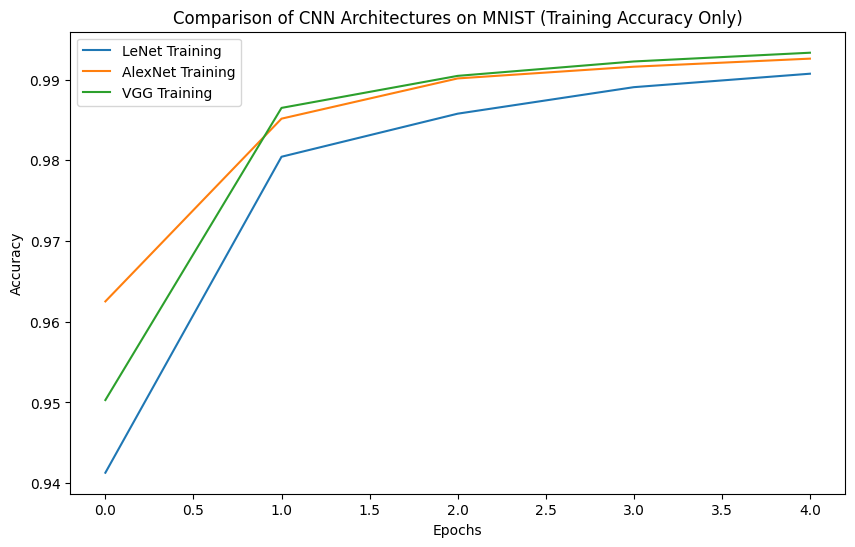

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


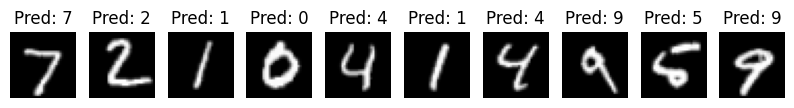

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import cv2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# resize images to 32x32
x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])

# normalize and reshape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

def lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def alexnet():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def vgg():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# dictionary of architectures
architectures = {'LeNet': lenet(), 'AlexNet': alexnet(), 'VGG': vgg()}

plt.figure(figsize=(10, 6))
for name, model in architectures.items():
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, verbose=0)

    plt.plot(history.history['accuracy'], label=f'{name} Training')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of CNN Architectures on MNIST (Training Accuracy Only)')
plt.show()

predictions = architectures['VGG'].predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(32, 32), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}')
    ax.axis('off')
plt.show()

## AlexNet

/opt/anaconda3/envs/tf_metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-23 13:16:31.131922: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-23 13:16:31.131947: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-23 13:16:31.131952: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-23 13:16:31.132143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-23 13:16:31.132153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fact

Epoch 1/5


2025-04-23 13:16:31.843381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8864 - loss: 0.3374 - val_accuracy: 0.9873 - val_loss: 0.0388
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9863 - loss: 0.0466 - val_accuracy: 0.9888 - val_loss: 0.0447
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9901 - loss: 0.0339 - val_accuracy: 0.9887 - val_loss: 0.0412
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9923 - loss: 0.0249 - val_accuracy: 0.9895 - val_loss: 0.0478
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9927 - loss: 0.0269 - val_accuracy: 0.9930 - val_loss: 0.0400


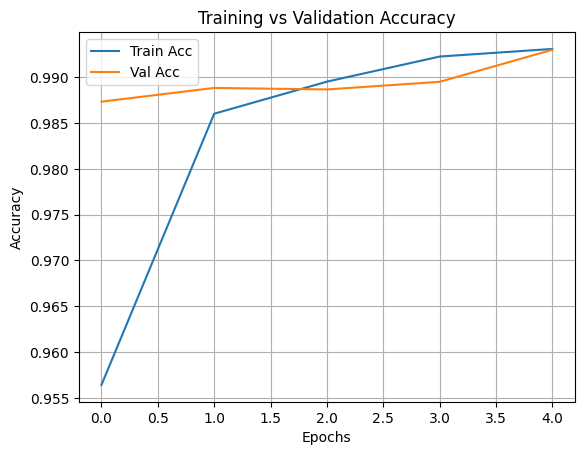

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


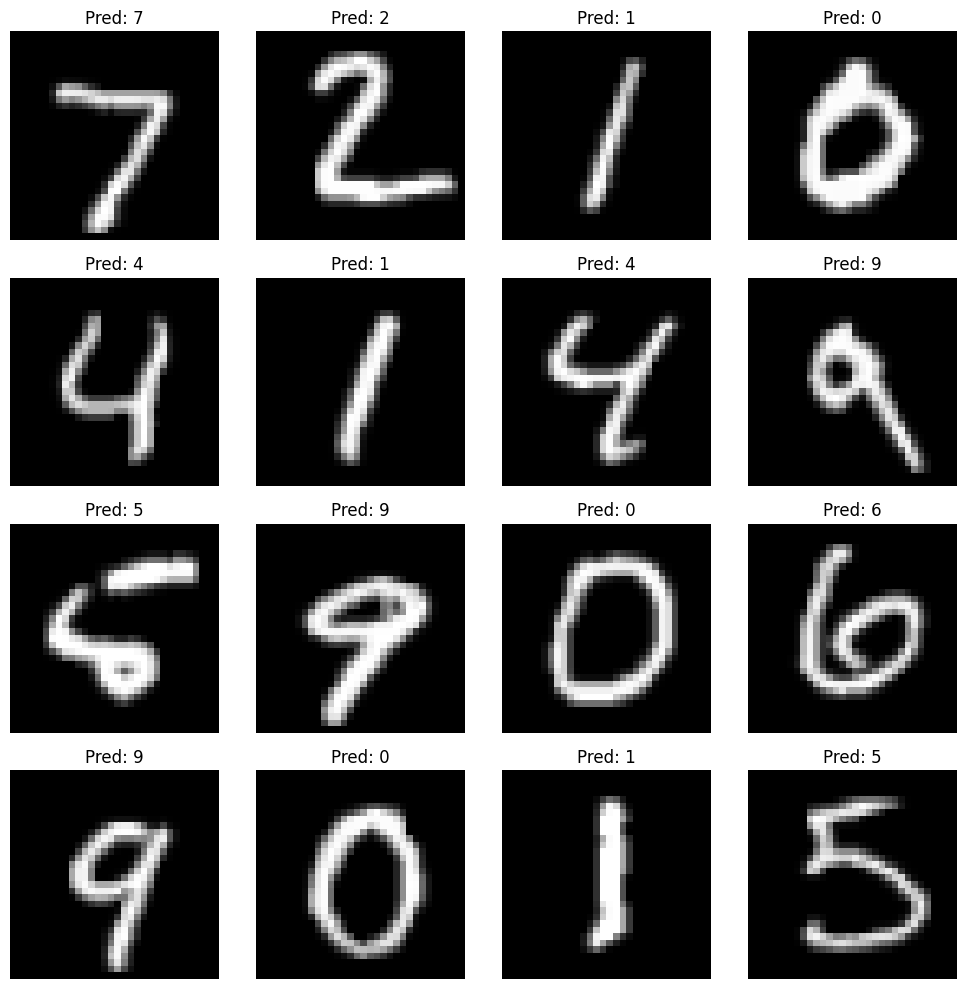

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to 32x32
x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])

# Normalize and reshape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

predictions = model.predict(x_test[:16])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(x_test[i]), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## VGGNet

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8947 - loss: 0.3233 - val_accuracy: 0.9882 - val_loss: 0.0388
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9867 - loss: 0.0410 - val_accuracy: 0.9923 - val_loss: 0.0345
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9907 - val_loss: 0.0323
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9942 - loss: 0.0196 - val_accuracy: 0.9880 - val_loss: 0.0433
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9912 - val_loss: 0.0343


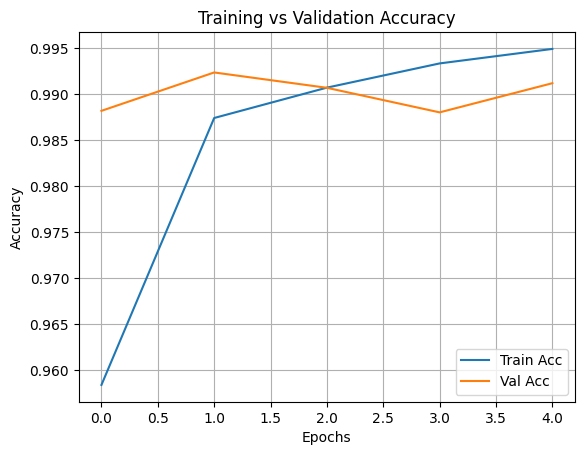

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


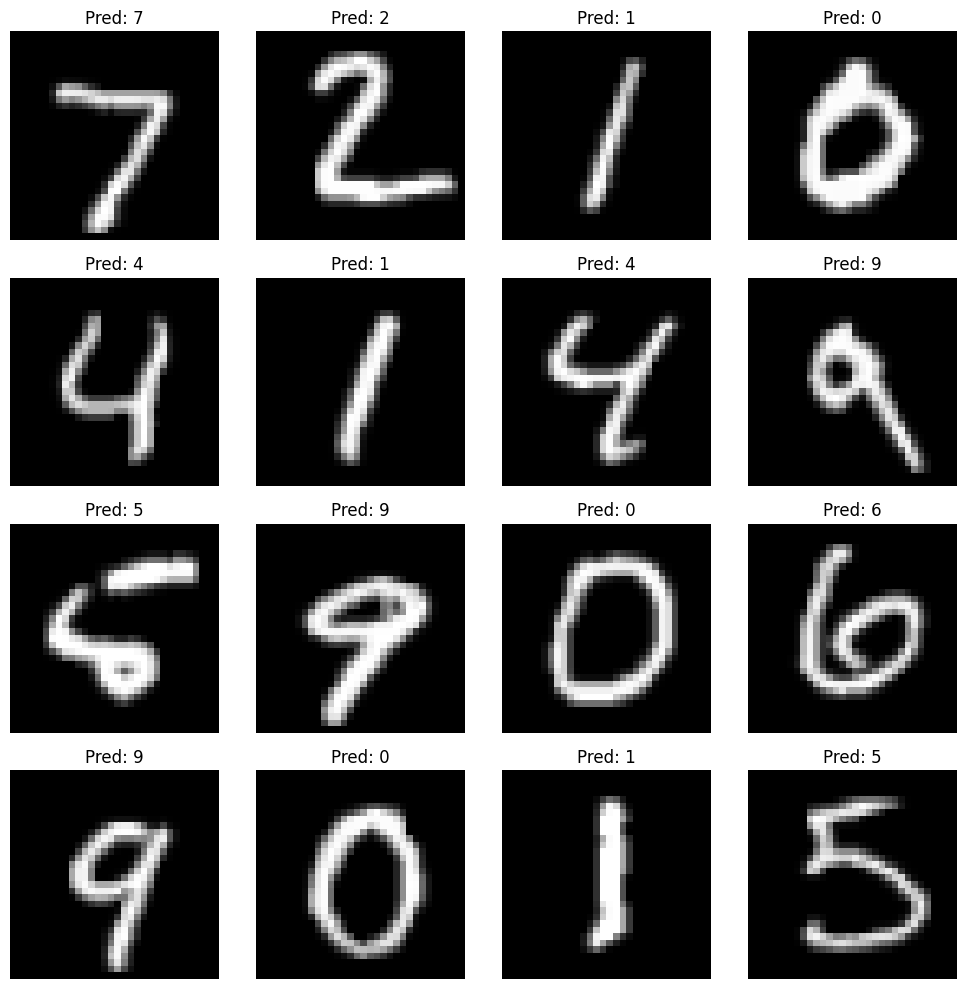

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

predictions = model.predict(x_test[:16])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(x_test[i]), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## LeNet

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8319 - loss: 0.5678 - val_accuracy: 0.9762 - val_loss: 0.0843
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9733 - loss: 0.0859 - val_accuracy: 0.9788 - val_loss: 0.0715
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9848 - val_loss: 0.0533
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9855 - val_loss: 0.0531
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9882 - val_loss: 0.0463


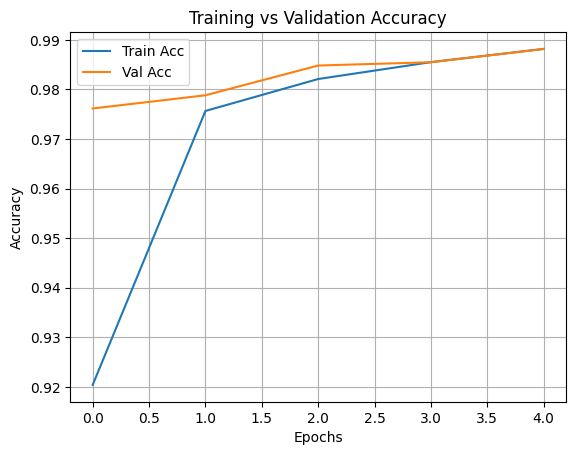

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


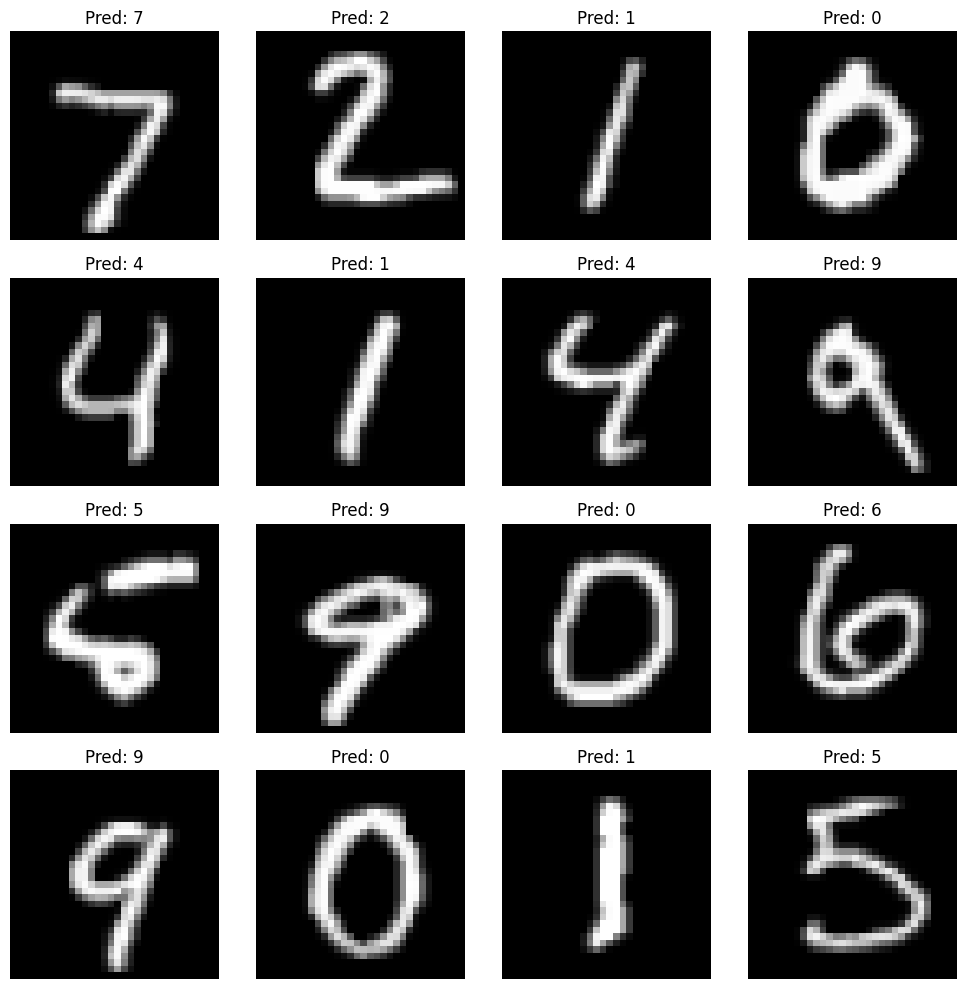

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)),
    layers.AvgPool2D(2),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AvgPool2D(2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

predictions = model.predict(x_test[:16])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(x_test[i]), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## PlaceNet

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8976 - loss: 0.3265 - val_accuracy: 0.9850 - val_loss: 0.0485
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 0.9897 - val_loss: 0.0383
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9903 - val_loss: 0.0349
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9853 - val_loss: 0.0500
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9927 - val_loss: 0.0270


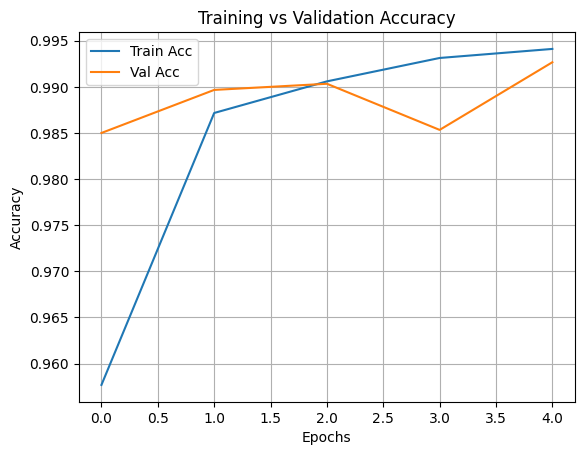

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


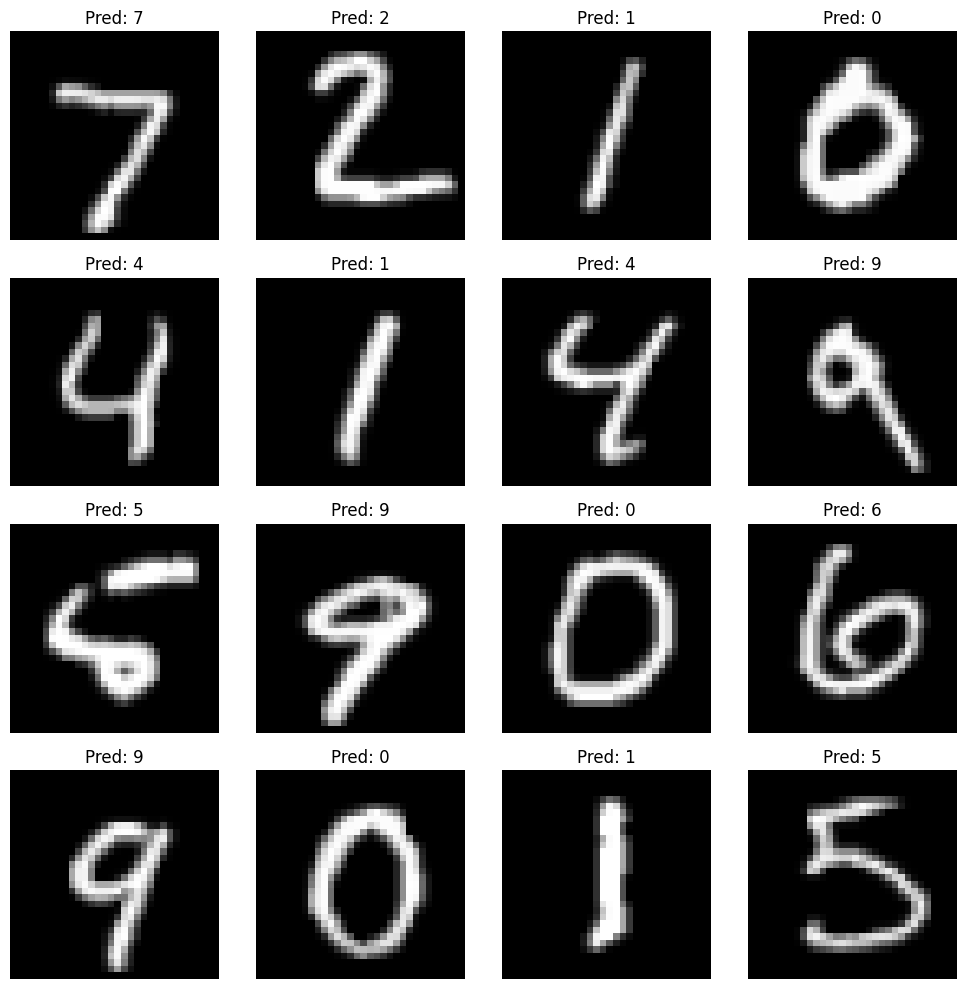

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_test = np.array([cv2.resize(img, (32, 32)) for img in x_test])

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

predictions = model.predict(x_test[:16])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(x_test[i]), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()